# imports

In [6]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
from scipy import stats


# Helper functions

In [7]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [8]:
def cramer_v(x,y):
  cm = pd.crosstab(x,y).values

  n = cm.sum()
  r, k = cm.shape

  chi2 = stats.chi2_contingency(cm)[0]
  chi2corr = max(0,chi2 - (k-1)*(r-1)/(n-1))
  kcorr = k- (k-1)**2/(n-1)
  rcorr = r- (r-1)**2/(n-1)
  return np.sqrt((chi2/n)/(min(kcorr-1,rcorr-1)))

# load data

In [9]:
df4 = pd.read_csv('../data/df3.csv',low_memory=False,parse_dates=['date','competition_since','promo_since'])

In [10]:
df4.head()

store  day_of_week       date  sales  promo state_holiday  school_holiday  \
0      1            5 2015-07-31   5263      1   regular_day               1   
1      2            5 2015-07-31   6064      1   regular_day               1   
2      3            5 2015-07-31   8314      1   regular_day               1   
3      4            5 2015-07-31  13995      1   regular_day               1   
4      5            5 2015-07-31   4822      1   regular_day               1   

  store_type assortment  competition_distance  ...  year  month  day  \
0          c      basic                1270.0  ...  2015      7   31   
1          a      basic                 570.0  ...  2015      7   31   
2          a      basic               14130.0  ...  2015      7   31   
3          c   extended                 620.0  ...  2015      7   31   
4          a      basic               29910.0  ...  2015      7   31   

   week_of_year  year_week  competition_since  competition_time_month  \
0            31    2015-07         2008-09-01                      84   
1            31    2015-07         2007-11-01                      94   
2            31    2015-07         2006-12-01                     105   
3            31    2015-07         2009-09-01                      71   
4            31    2015-07         2015-04-01                       4   

   promo_since  promo_time_week  season  
0   2015-07-27                0  summer  
1   2010-03-22              279  summer  
2   2011-03-28              226  summer  
3   2015-07-27                0  summer  
4   2015-07-27                0  summer  

[5 rows x 26 columns]

In [11]:
df4.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
is_promo                                 int64
year                                     int64
month                                    int64
day                                      int64
week_of_year                             int64
year_week                               object
competition_s

# Exploratory data analysis

In [12]:
num_attribures = df4.select_dtypes(include=['int64','int32','float64'])
cat_attribures = df4.select_dtypes(exclude=['int64','int32','float64','datetime64[ns]'])

## Univariate analysis

### target variable

C:\Users\Lavin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

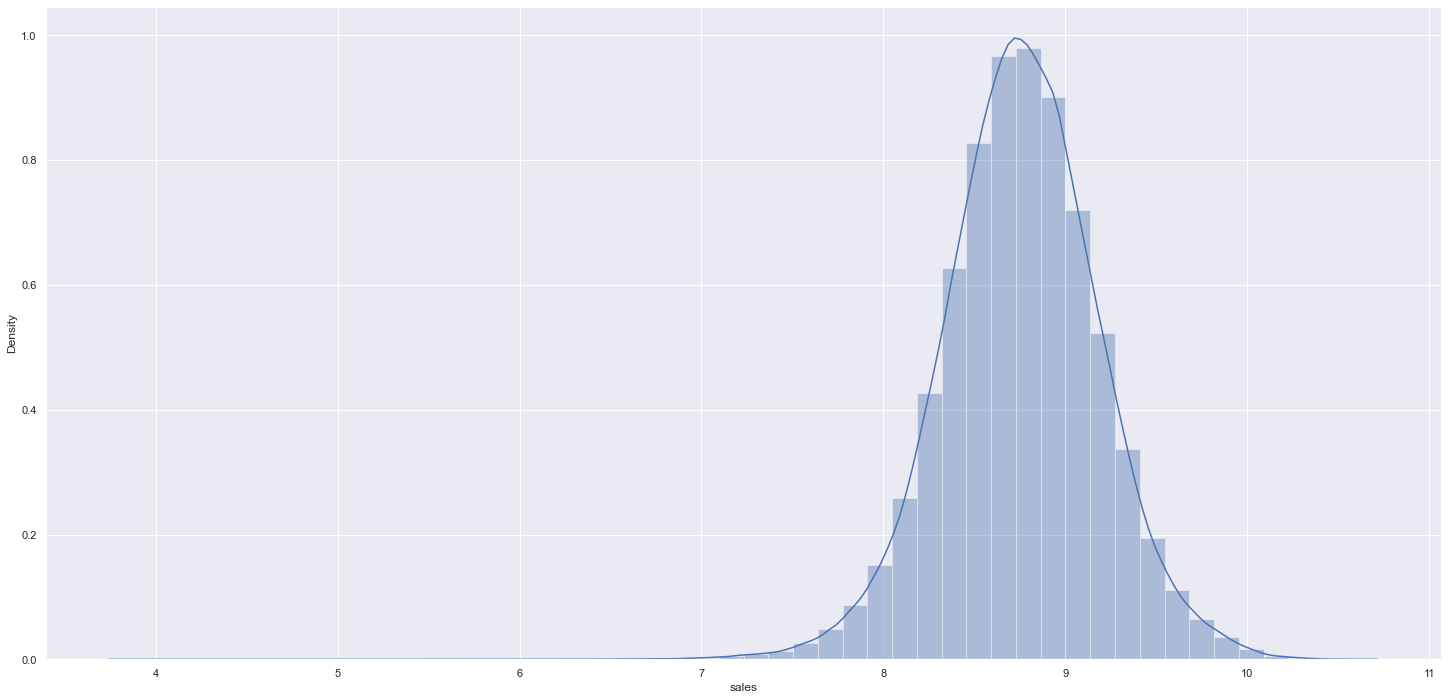

In [13]:
sns.distplot(np.log(df4['sales']))

### Numerical variables

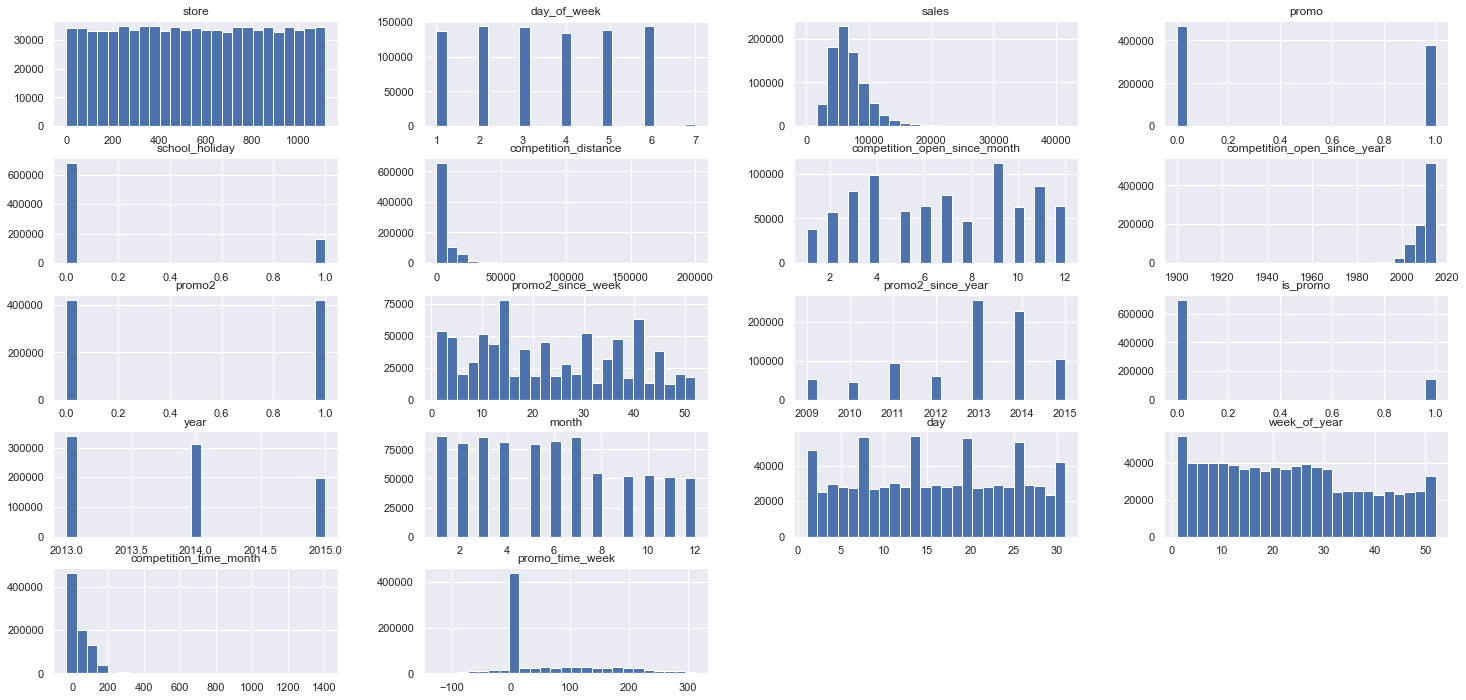

In [14]:
num_attribures.hist(bins=25);

### Categorical Variable

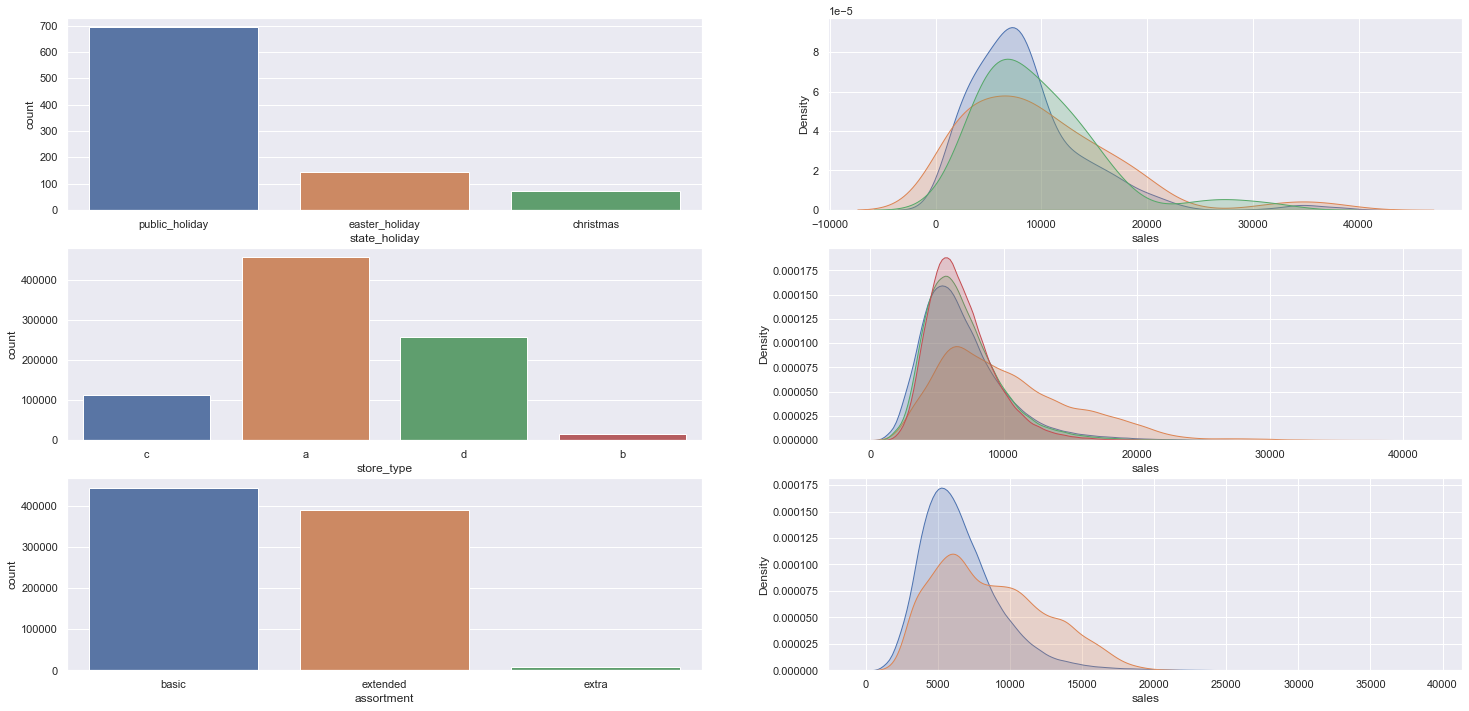

In [15]:
plt.subplot(3,2,1)
aux = df4[df4['state_holiday']!='regular_day']
sns.countplot(x='state_holiday',data=aux);

plt.subplot(3,2,2)
aux =df4[df4['state_holiday']=='public_holiday']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['state_holiday']=='easter_holiday']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['state_holiday']=='christmas']['sales']
sns.kdeplot(aux,shade=True)


plt.subplot(3,2,3)
sns.countplot(x='store_type',data=df4);

plt.subplot(3,2,4)
aux =df4[df4['store_type']=='a']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['store_type']=='b']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['store_type']=='c']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['store_type']=='d']['sales']
sns.kdeplot(aux,shade=True)

plt.subplot(3,2,5)
sns.countplot(x='assortment',data=df4);

plt.subplot(3,2,6)
aux =df4[df4['assortment']=='basic']['sales']
sns.kdeplot(aux,shade=True,label='basic')
aux =df4[df4['assortment']=='extra']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['assortment']=='extended']['sales']

## Bivariate analysis

### h1: Lojas com maior sortmento deveriam vender mais

**h1: Stores with more "assortment" should sell more**

<AxesSubplot:xlabel='year_week'>

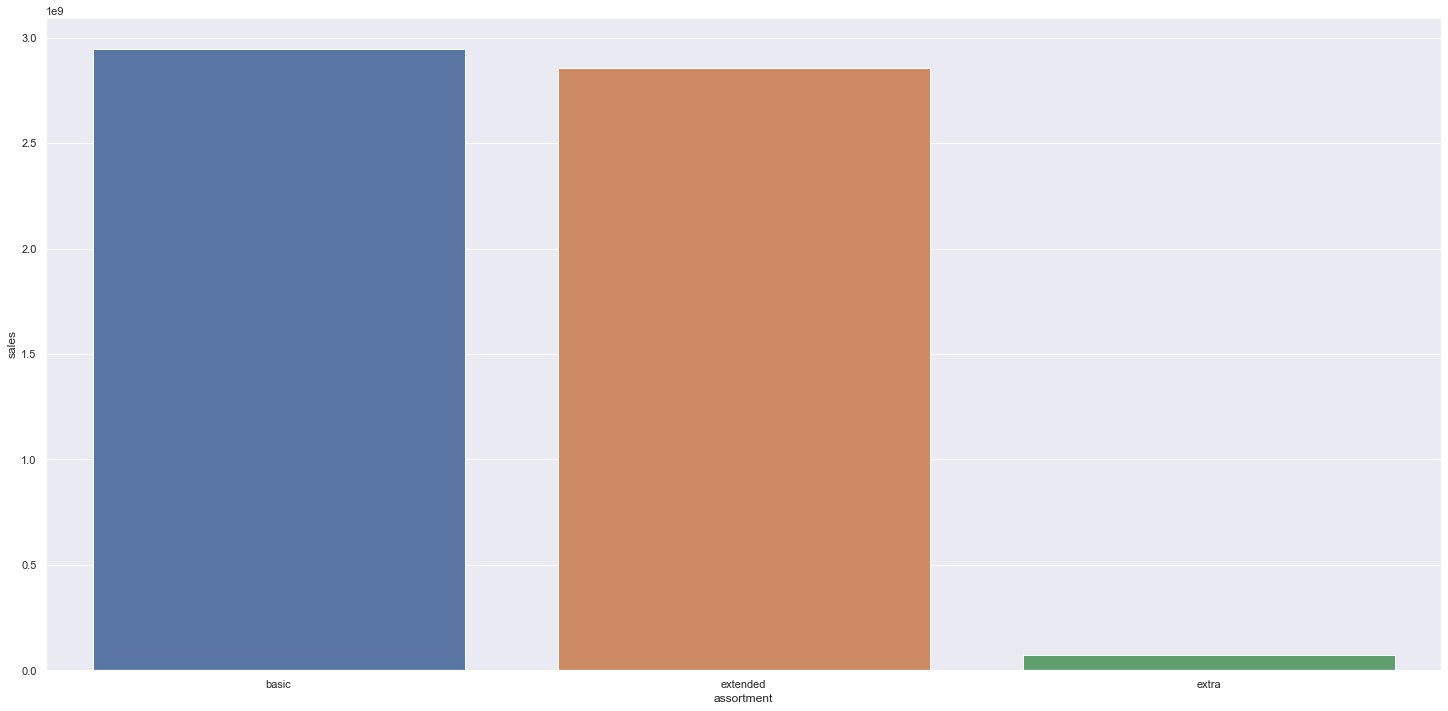

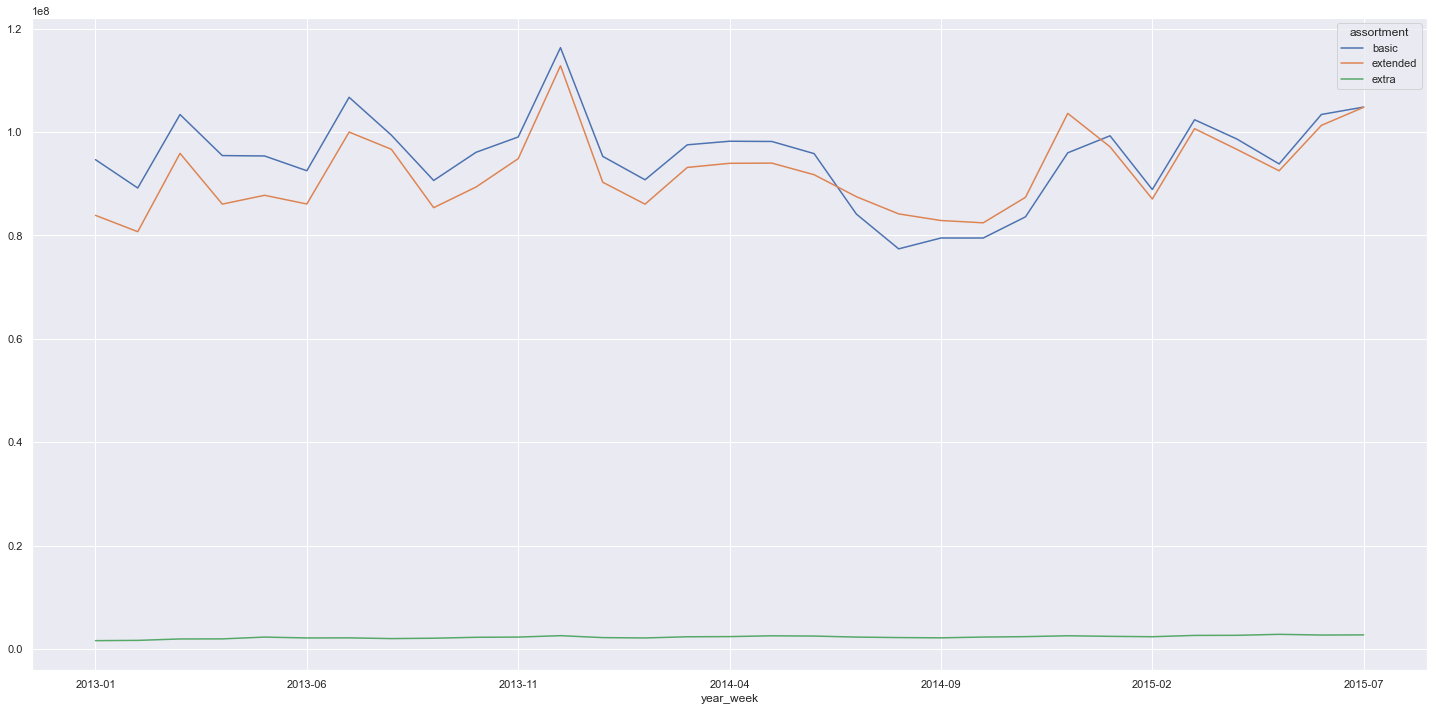

In [16]:
h1 = df4[['assortment','sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment',y='sales',data=h1);

h1_b = df4[['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
h1_b.pivot(index='year_week',columns='assortment',values='sales').plot()

<AxesSubplot:>

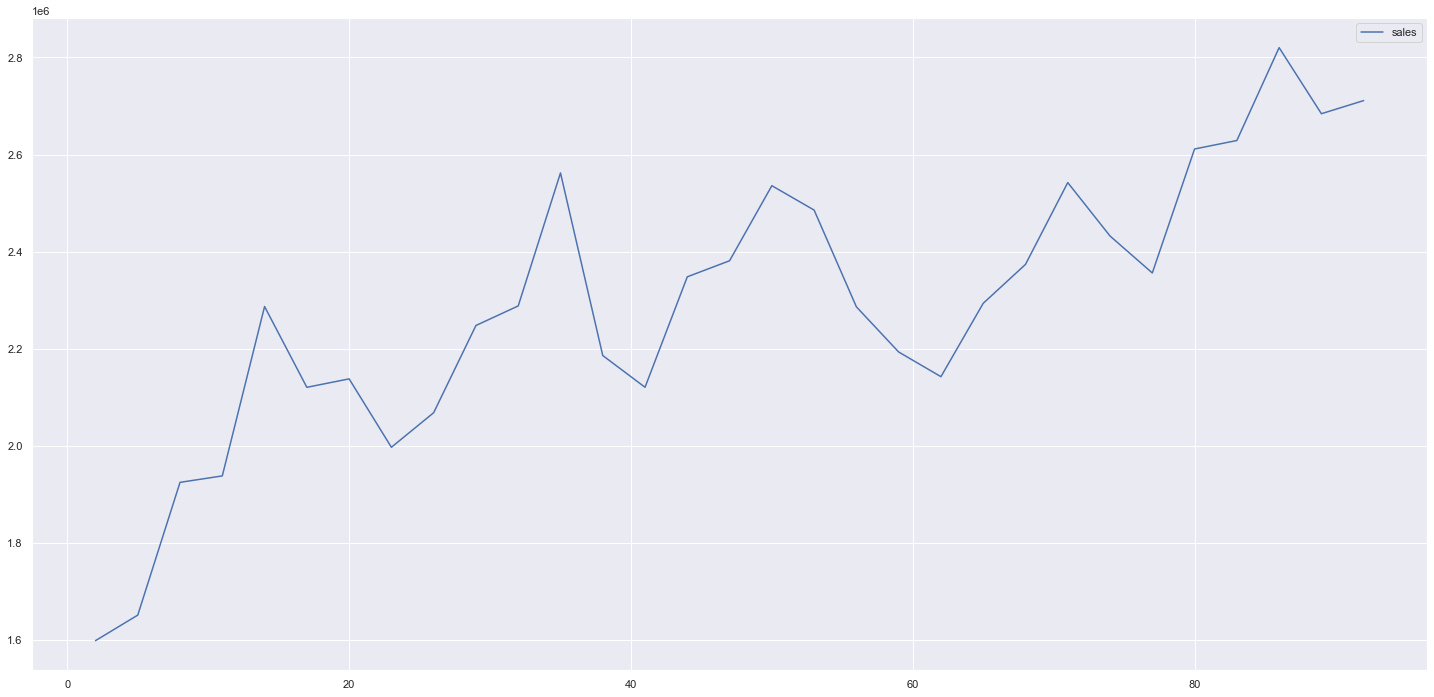

In [17]:
h1_b[h1_b['assortment']=='extra'].plot()

In [18]:
df4['assortment'].value_counts(normalize=True)

basic       0.526892
extended    0.463386
extra       0.009722
Name: assortment, dtype: float64

**Falso, lojas com maior sortmento não vendem mais, mas tem que se levar em consideração que lojas com assortment extra só representam por volta de 0.01 % das lojas.**

**False, stores with a larger assortment don't sell more, but it must be taken into consideration that stores stores with big assortment represent only  0.01% of the stores.**

### h2: Lojas com competidores mais distantes deveriam vender mais

**h2: Stores with more distant competitors should sell more**

<AxesSubplot:>

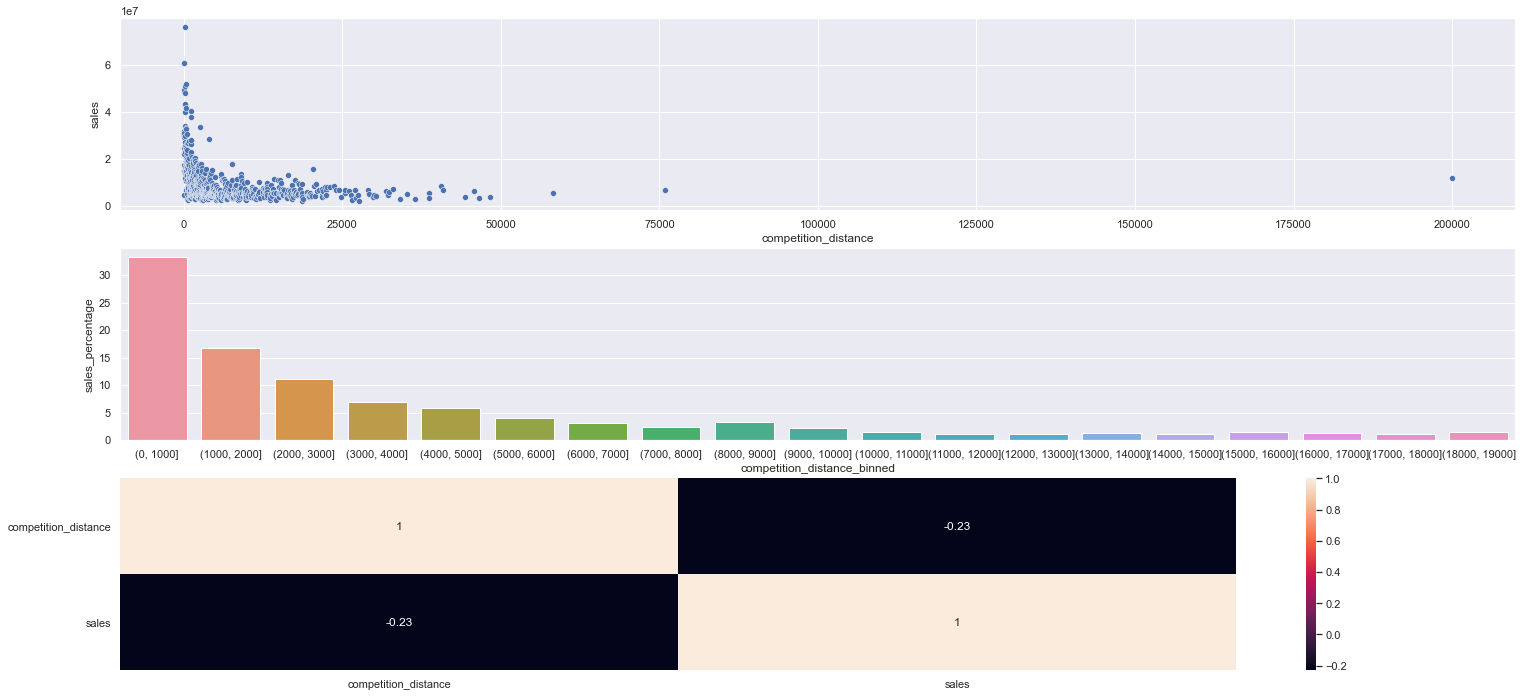

In [19]:
h2 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()
bins = list(np.arange(0,20000,1000))
h2['competition_distance_binned'] = pd.cut(h2['competition_distance'],bins=bins)
plt.subplot(3,1,1)
sns.scatterplot(x='competition_distance',y='sales',data=h2);
plt.subplot(3,1,2)
h2_b = h2[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
h2_b['sales_percentage'] = round((h2_b['sales']/h2_b['sales'].sum())*100,2)
sns.barplot(x='competition_distance_binned',y='sales_percentage',data=h2_b);
plt.subplot(3,1,3)
sns.heatmap(h2.corr(method='pearson'),annot=True)

**Falso, lojas com competidores mais distantes vendem menos**

**False, Stores with more distants competitors sell less**

### h3: lojas com competidores a mais tempo deveriam vender mais

**h3: Stores with longer competitors should sell more**

<AxesSubplot:>

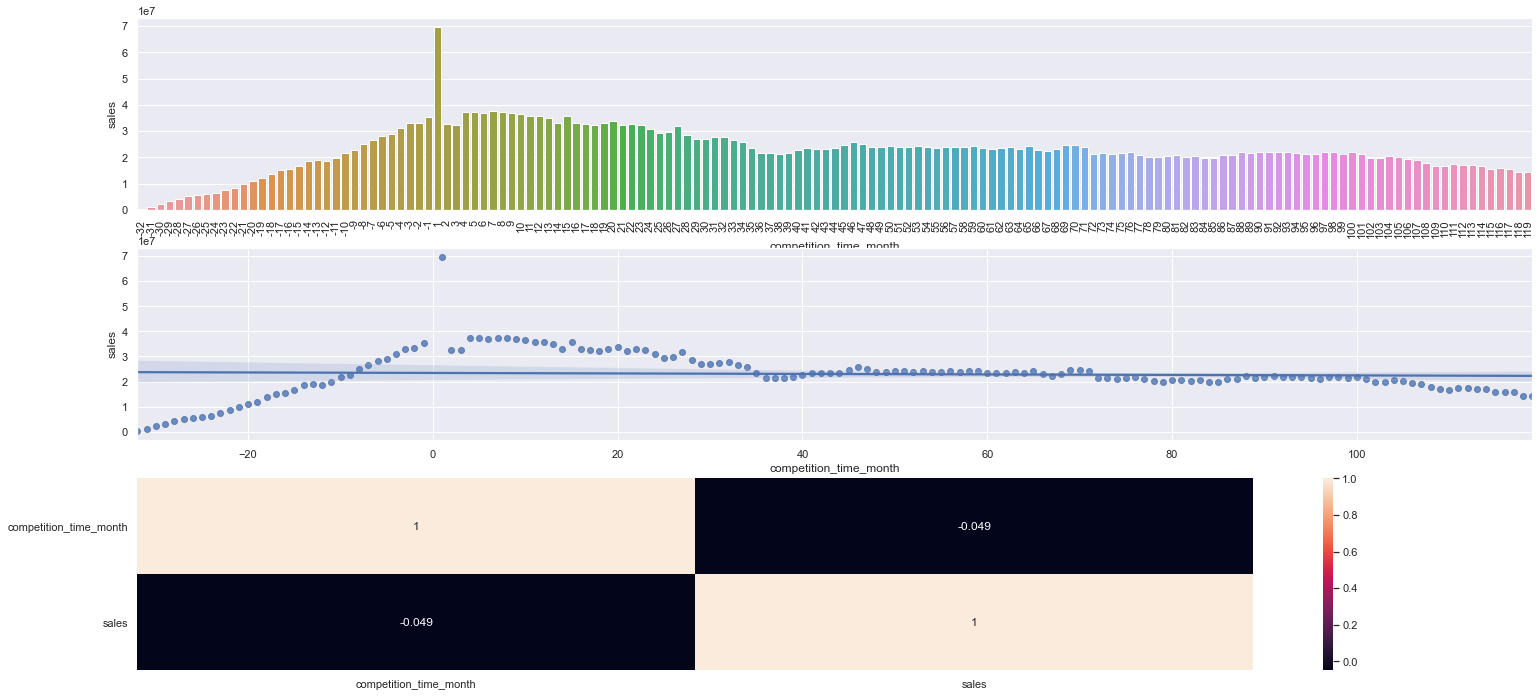

In [20]:
h3 = df4[['competition_time_month','sales']].groupby('competition_time_month').sum().reset_index()
h3 = h3[(h3['competition_time_month'] < 120)&(h3['competition_time_month']!=0)]
plt.subplot(3,1,1)
sns.barplot(x='competition_time_month',y='sales',data=h3)
plt.xticks(rotation=90);
plt.subplot(3,1,2)
sns.regplot(x='competition_time_month',y='sales',data=h3)
plt.subplot(3,1,3)
sns.heatmap(h3.corr(method='pearson'),annot=True)

**Falsa, lojas com competidores a mais tempo vendem menos**

**False, stores with more longer competitors sell less**

### h4: Lojas com maior porte deveriam vender mais

**h4: Larger stores should sell more**

<AxesSubplot:xlabel='store_type', ylabel='sales'>

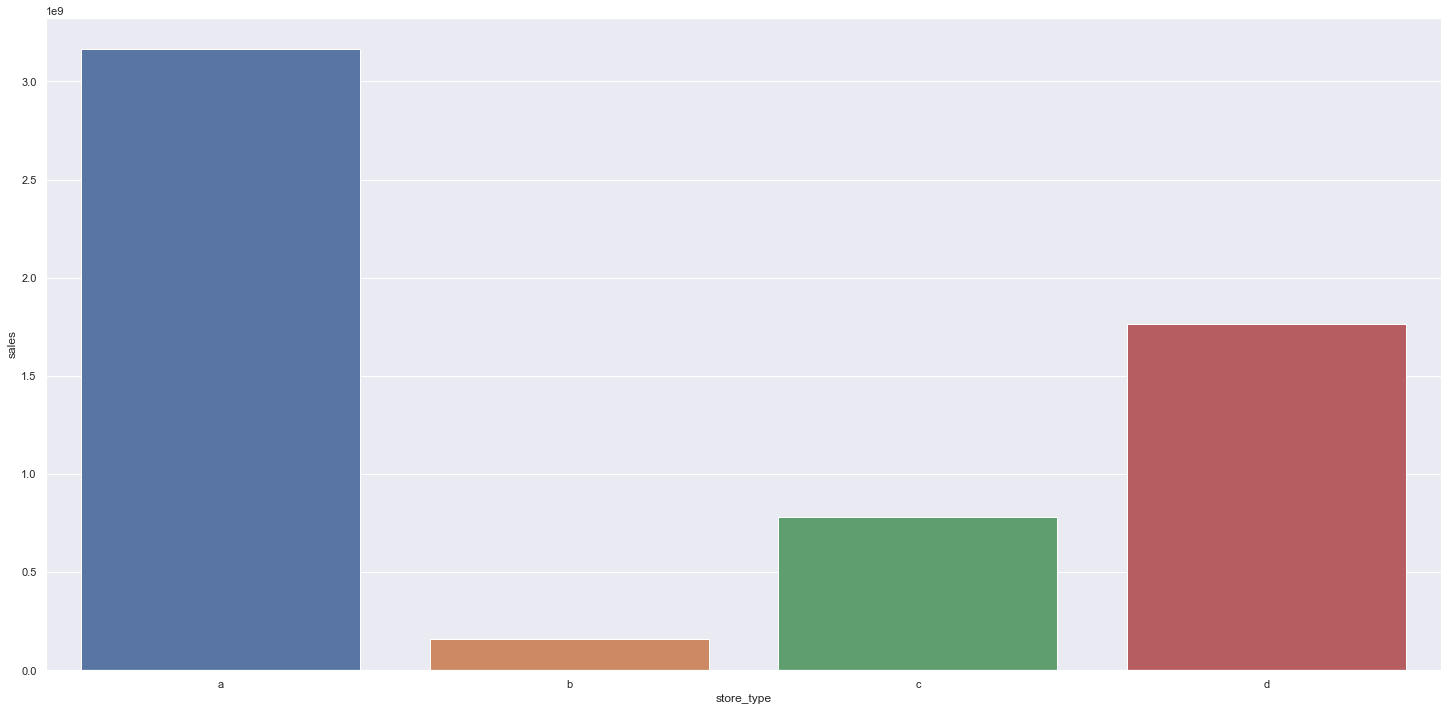

In [21]:
h4 = df4[['store_type','sales']].groupby('store_type').sum().reset_index()
sns.barplot(x='store_type',y='sales',data=h4)

<AxesSubplot:xlabel='year_week'>

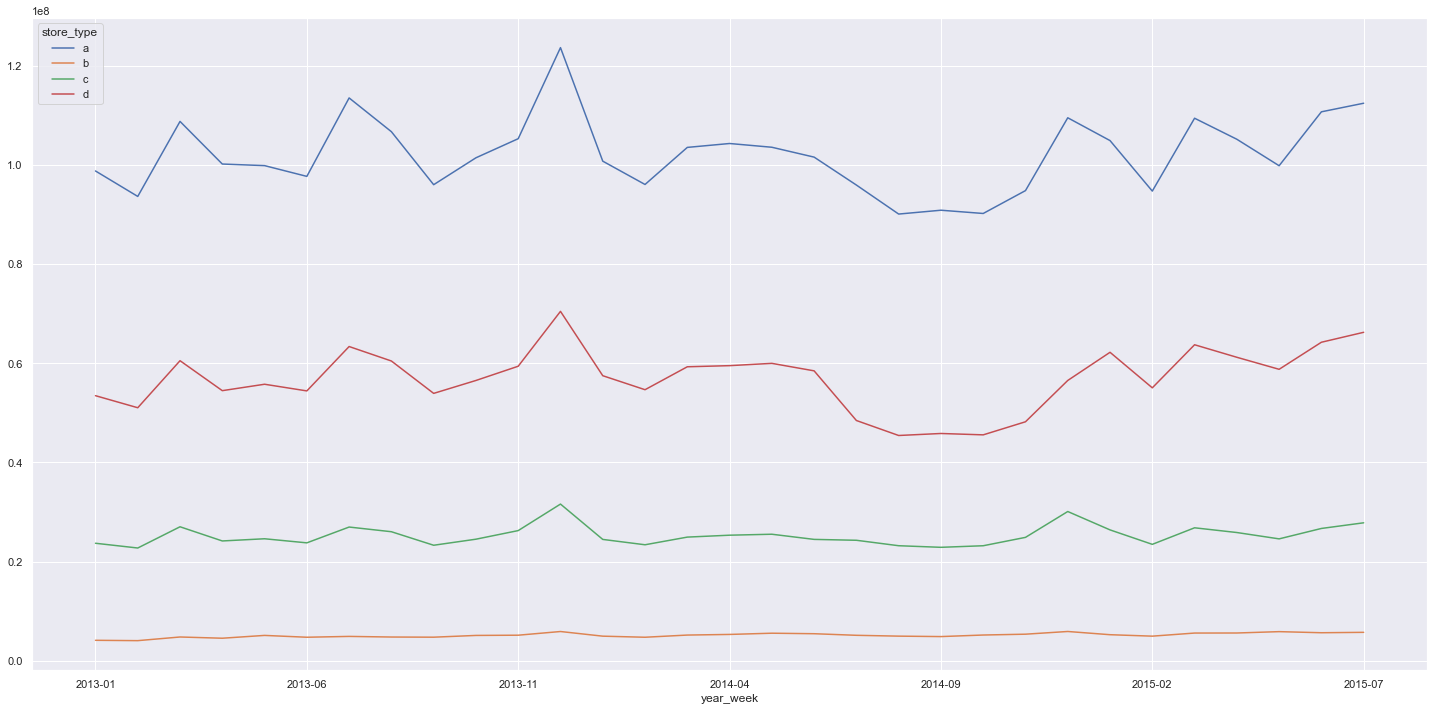

In [22]:
h4_b = df4[['year_week','store_type','sales']].groupby(['year_week','store_type']).sum().reset_index()
h4_b.pivot(index='year_week',columns='store_type',values='sales').plot()

In [23]:
df4['store_type'].value_counts(normalize=True)

a    0.541302
d    0.306474
c    0.133795
b    0.018429
Name: store_type, dtype: float64

**Falso, lojas com maior porte não necessariamente vendem mais**

**False, bigger stores do not necessarily sell more**

### h5: Lojas com promoções por mais tempo deveriam vender mais

**h5: Stores with longer promotions should sell more**

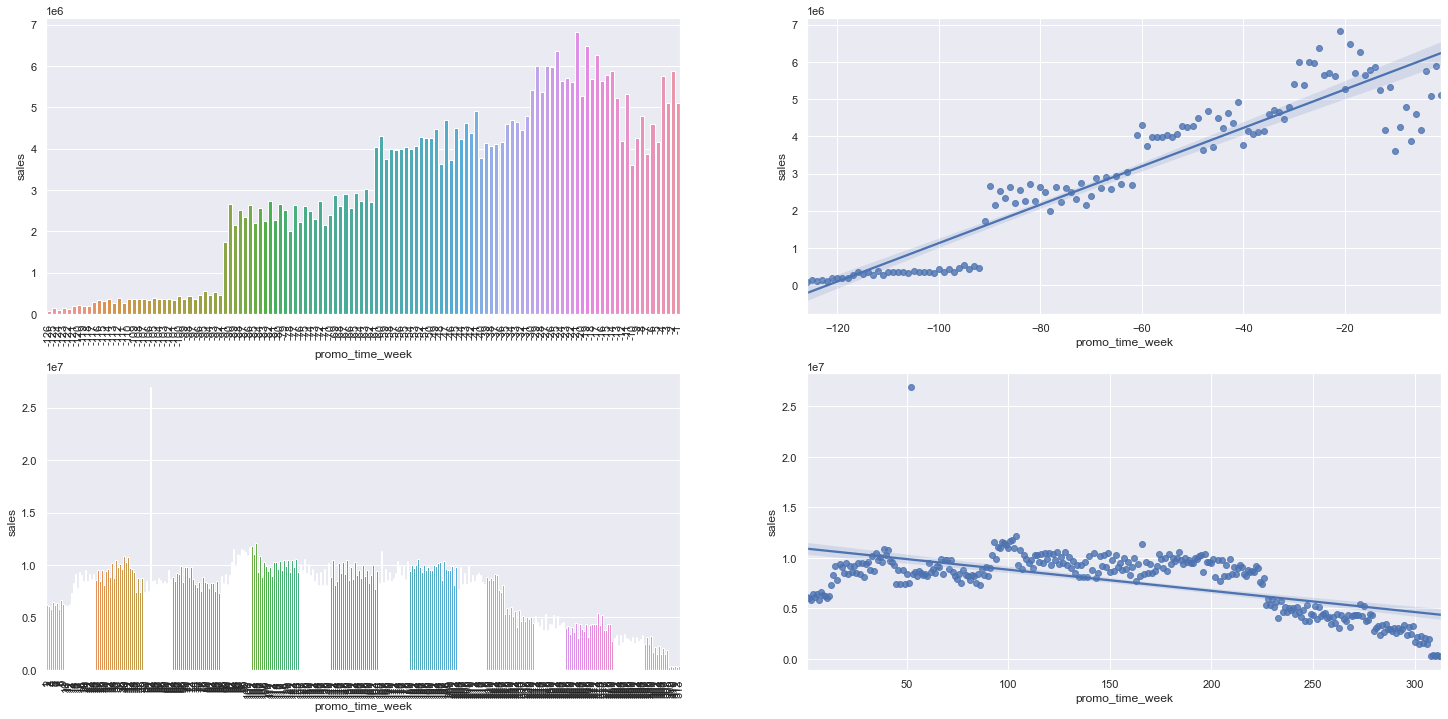

In [24]:
h5 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()
plt.subplot(2,2,1)
sns.barplot(x='promo_time_week',y='sales',data=h5[h5['promo_time_week']<0]);
plt.xticks(rotation=90);
plt.subplot(2,2,2)
sns.regplot(x='promo_time_week',y='sales',data=h5[h5['promo_time_week']<0]);

plt.subplot(2,2,3)
sns.barplot(x='promo_time_week',y='sales',data=h5[h5['promo_time_week']>0]);
plt.xticks(rotation=90);
plt.subplot(2,2,4)
sns.regplot(x='promo_time_week',y='sales',data=h5[h5['promo_time_week']>0]);

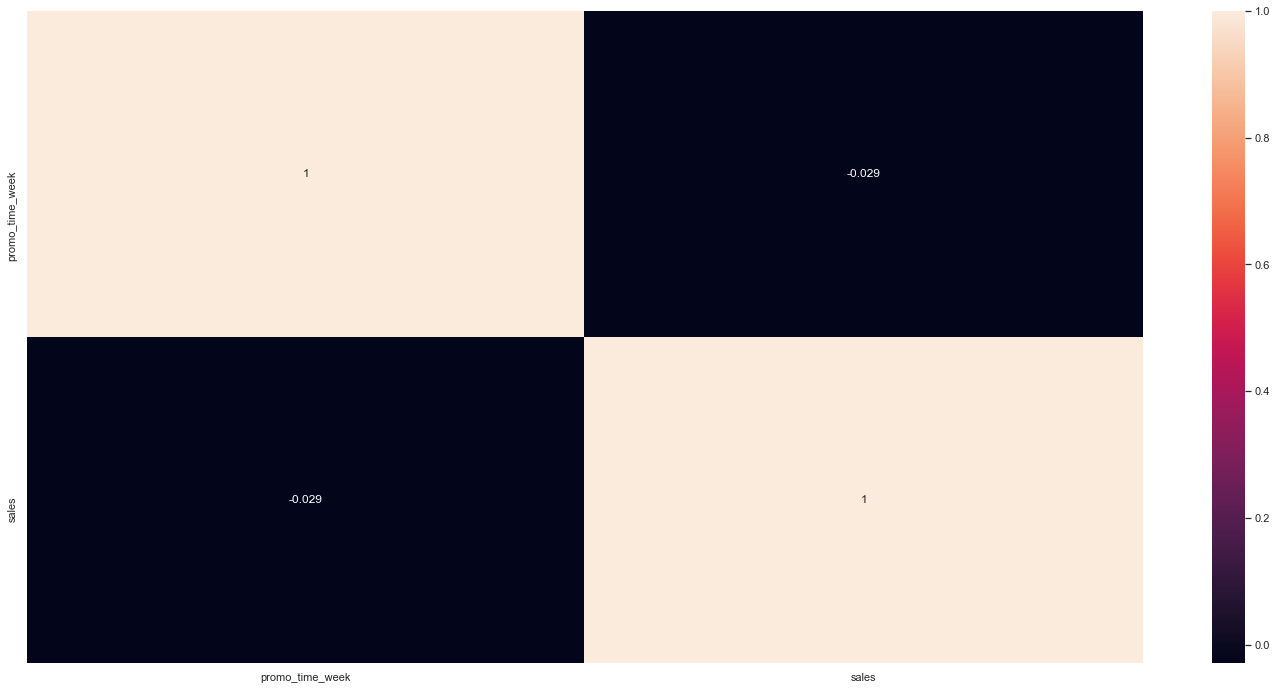

In [25]:
sns.heatmap(h5.corr(method='pearson'),annot=True);

**Falso, lojas com um certo periodo de venda, vendem menos após um certo periodo de promoção**

**False, stores with a certain sales period, sell less after a certain promotion period**

### h6: Lojas com mais promoções deveriam vender mais

In [26]:
h6 = df4[['promo','promo2','sales']].groupby(['promo','promo2']).sum().reset_index()
h6

promo  promo2       sales
0      0       0  1482612096
1      0       1  1289362241
2      1       0  1628930532
3      1       1  1472275754

Text(0, 0.5, 'Sales')

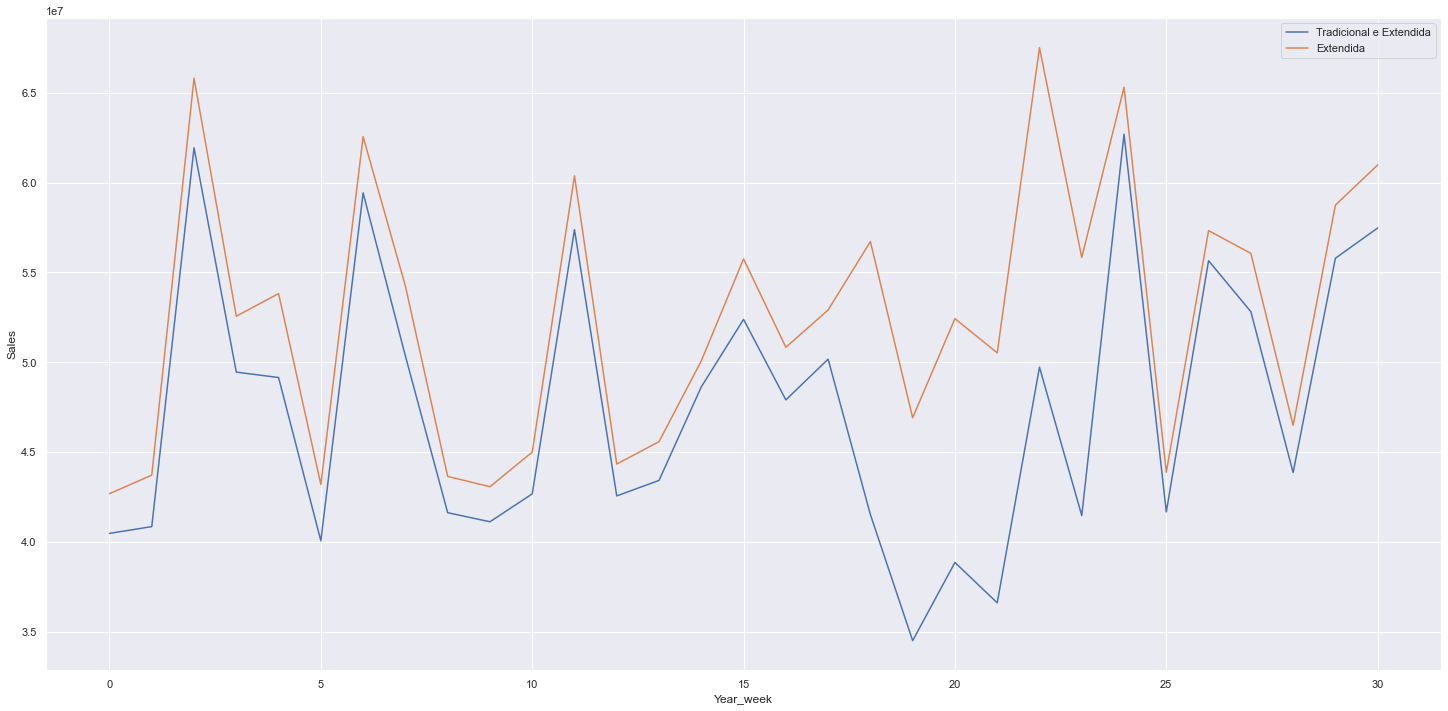

In [27]:
h6_b = df4[(df4['promo']==1)&(df4['promo2']==1)][['year_week','sales']].groupby('year_week').sum().reset_index()
ax = h6_b.plot()

h6_c = df4[(df4['promo']==1)&(df4['promo2']==0)][['year_week','sales']].groupby('year_week').sum().reset_index()
h6_c.plot(ax=ax)
ax.legend(labels=['Tradicional e Extendida','Extendida']);
plt.xlabel('Year_week')
plt.ylabel('Sales')

**Falsa, lojas com mais promoções consecutivas, vendem menos**

**False, stores with consecutive promotions, sell less**

### h7: Lojas abertas durante o natal deveriam vender mais


**h7: Stores open during Christmas should sell more**

<AxesSubplot:xlabel='year', ylabel='sales'>

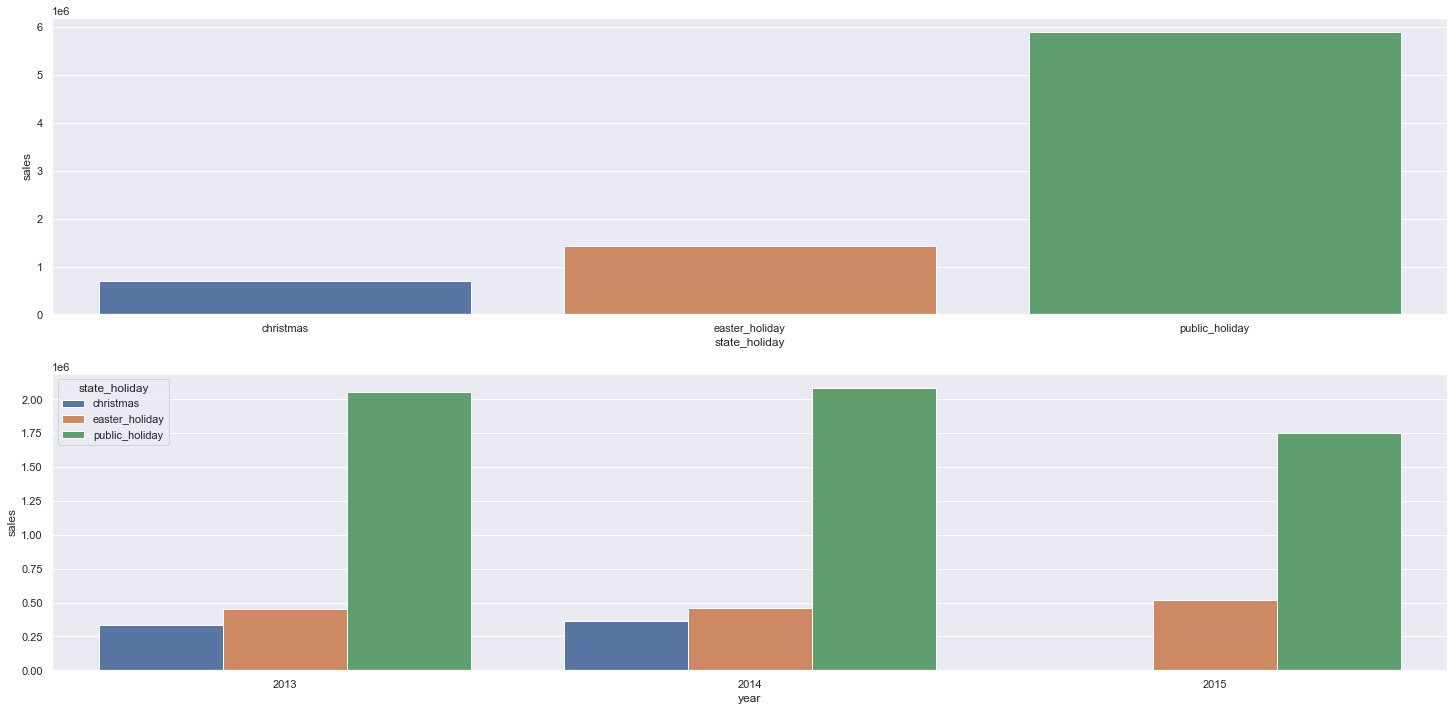

In [28]:
h7 = df4[df4['state_holiday']!='regular_day'][['state_holiday','sales']].groupby('state_holiday').sum().reset_index()
plt.subplot(2,1,1)
sns.barplot(x='state_holiday',y='sales',data=h7)
plt.subplot(2,1,2)
h7_b = df4[df4['state_holiday']!='regular_day'][['year','state_holiday','sales']].groupby(['year','state_holiday']).sum().reset_index()
sns.barplot(x='year',y='sales',hue='state_holiday',data=h7_b)

**Falso, Lojas não vendem mais durante o natal**

**False, stores don't oversell during christmas**

### h8: Lojas deveriam vender mais ao longo dos anos

**h8: Stores should sell more over the years**

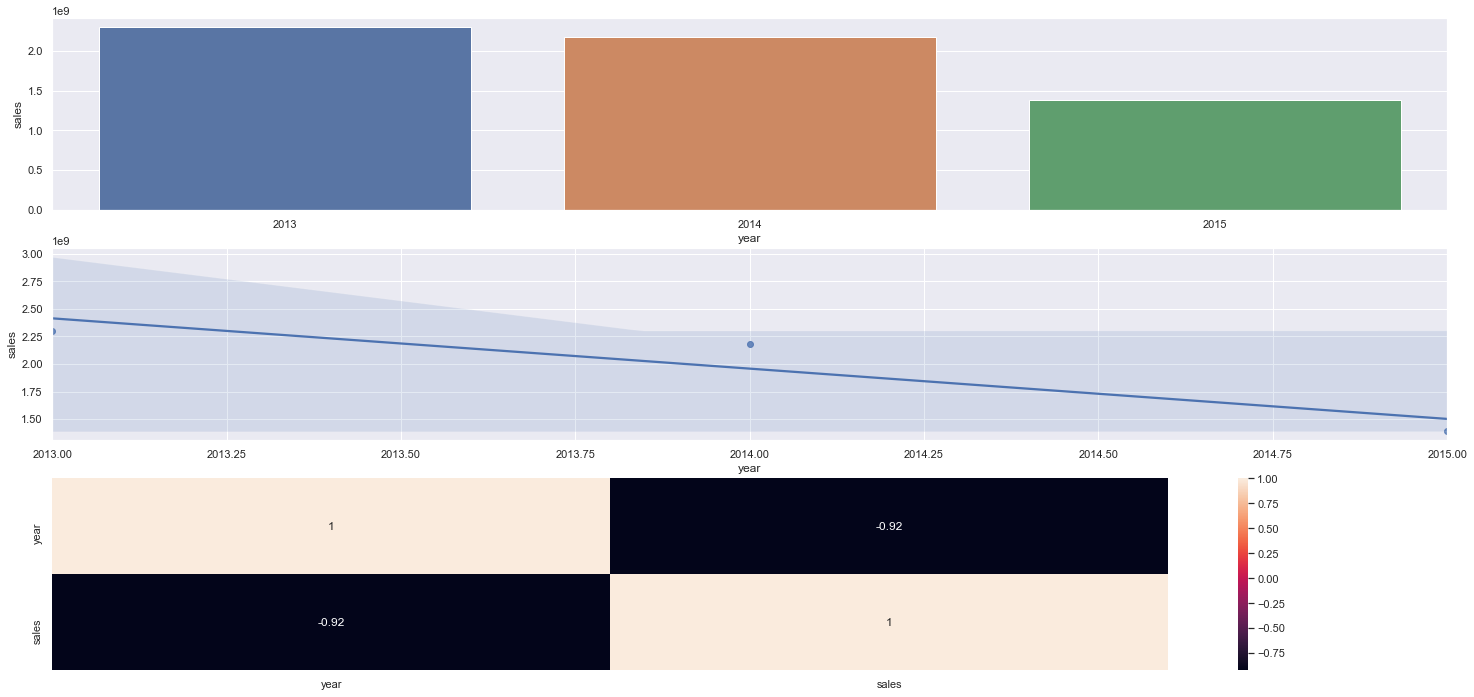

In [29]:
h8 = df4[['year','sales']].groupby('year').sum().reset_index()
plt.subplot(3,1,1)
sns.barplot(x='year',y='sales',data=h8)
plt.subplot(3,1,2)
sns.regplot(x='year',y='sales',data=h8)
plt.subplot(3,1,3)
sns.heatmap(h8.corr(method='pearson'),annot=True);


**Falso, lojas estão vendendo menos ao longo dos anos**

**False, Stores are selling less year after year**

### h9: lojas que abrem nos primeiros 6 meses deveriam vender mais

**h9: Stores that open in the first 6 months should sell more**

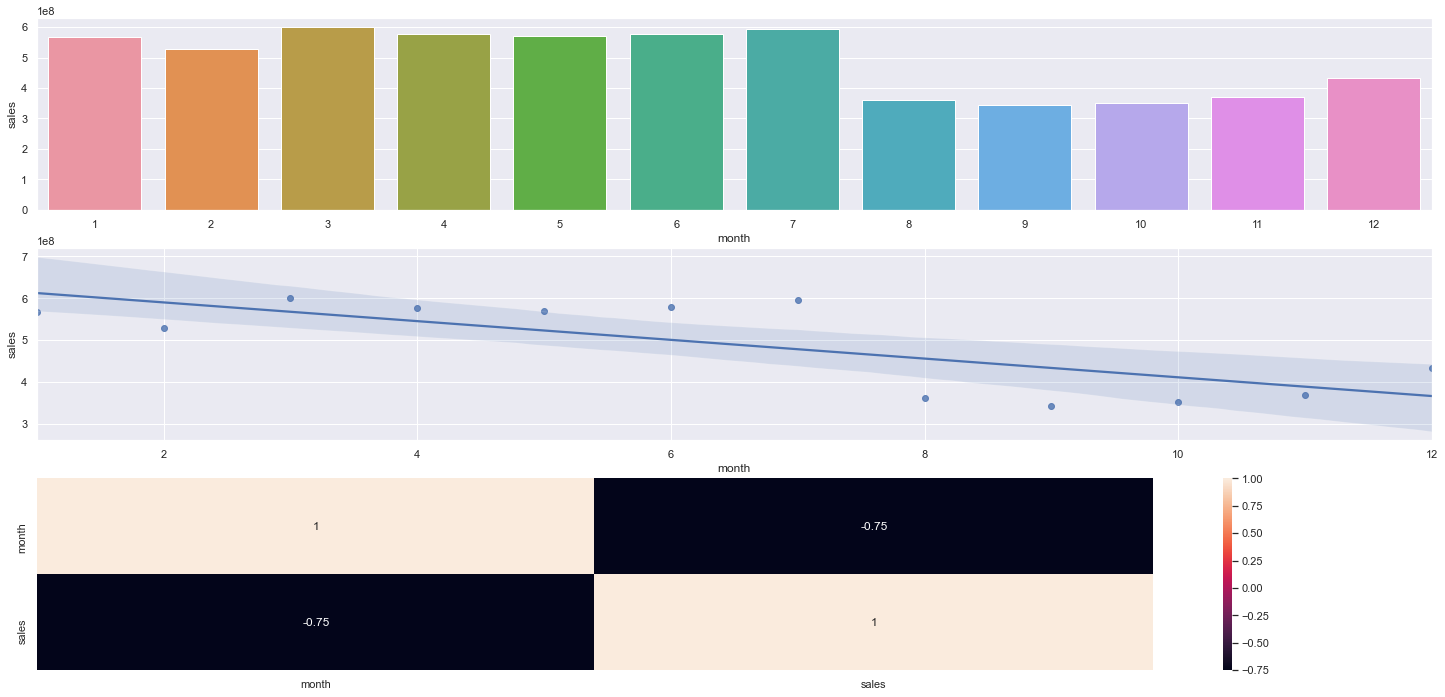

In [30]:
h9 = df4[['month','sales']].groupby('month').sum().reset_index()
plt.subplot(3,1,1)
sns.barplot(x='month',y='sales',data=h9)
plt.subplot(3,1,2)
sns.regplot(x='month',y='sales',data=h9)
plt.subplot(3,1,3)
sns.heatmap(h9.corr(method='pearson'),annot=True);


**Verdadeiro, lojas no primeiro semestre vendem mais**

**True, stores sell more in the first 6 months oh the year**

### h10: Lojas deveriam vender mais depois do dia 10 de cada mês

**h10: Stores should sell more after the 10th of each month**

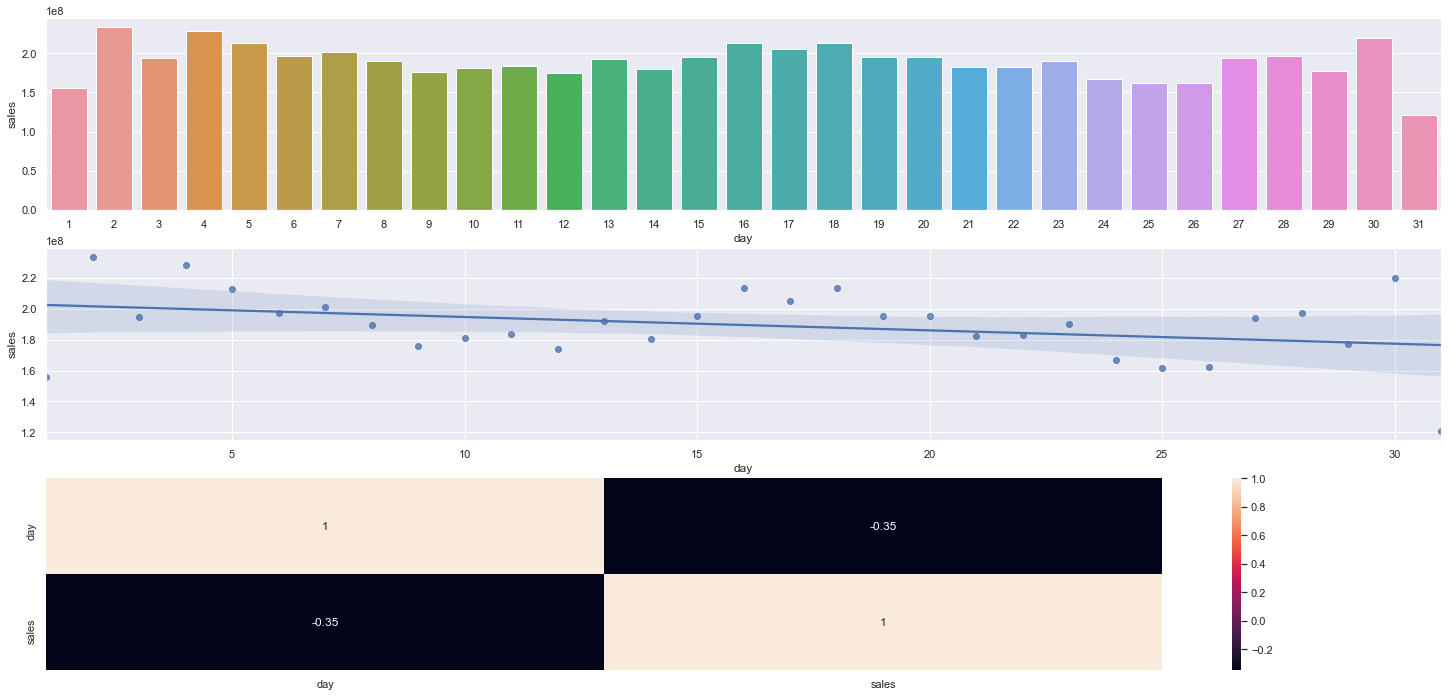

In [31]:
h10 = df4[['day','sales']].groupby('day').sum().reset_index()
plt.subplot(3,1,1)
sns.barplot(x='day',y='sales',data=h10)
plt.subplot(3,1,2)
sns.regplot(x='day',y='sales',data=h10)
plt.subplot(3,1,3)
sns.heatmap(h10.corr(method='pearson'),annot=True);


**Verdadeiro, lojas vendem mais depois do dia 10**

**True, Stores sell more after the 10th day**

### h11: lojas que abrem nos finais de semanas deveriam veender mais

 **h11: Stores that open on weekends should sell more**

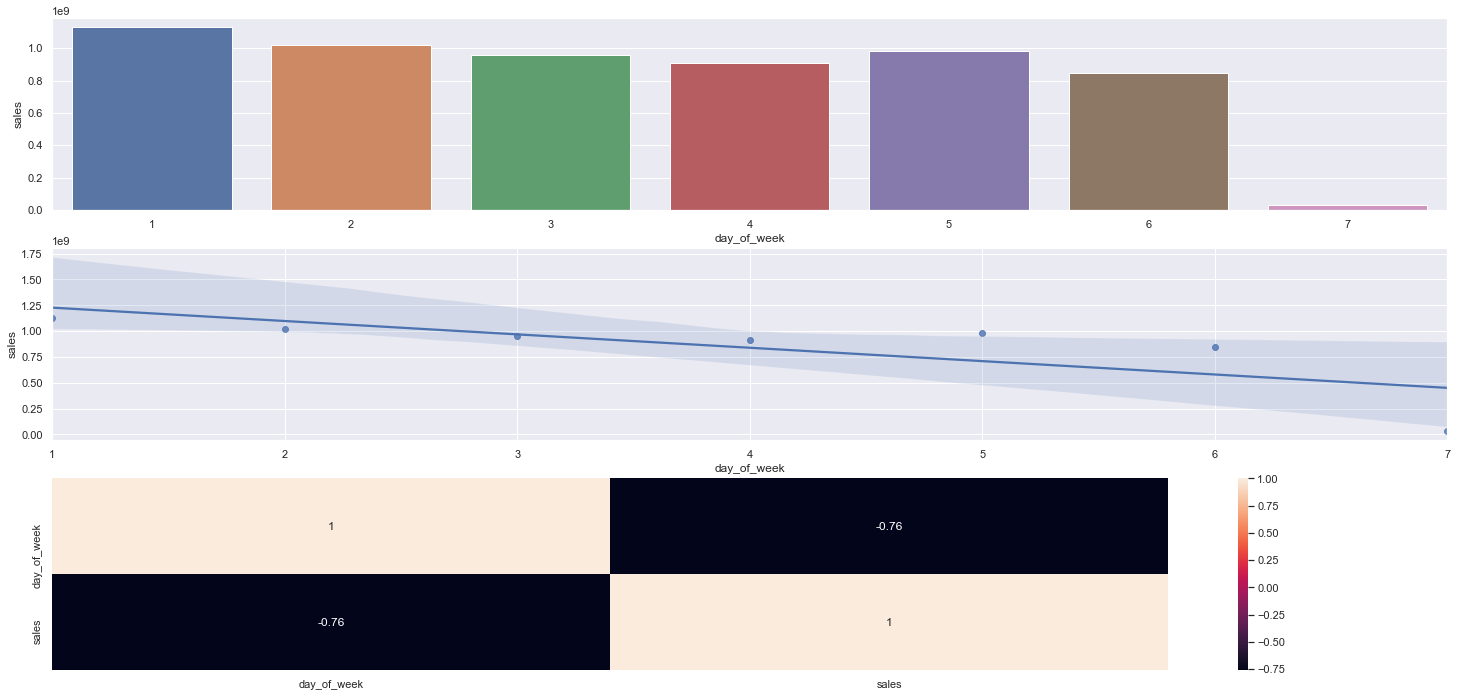

In [32]:
h11 = df4[['day_of_week','sales']].groupby('day_of_week').sum().reset_index()
plt.subplot(3,1,1)
sns.barplot(x='day_of_week',y='sales',data=h11)
plt.subplot(3,1,2)
sns.regplot(x='day_of_week',y='sales',data=h11)
plt.subplot(3,1,3)
sns.heatmap(h11.corr(method='pearson'),annot=True);


**Falso, lojas vendem menos nos fim de semanas**

**False, Stores sell less in the weekends**

### h12: lojas vendem mais no inverno

**h12: Stores sell more in winter**

<AxesSubplot:xlabel='year', ylabel='sales'>

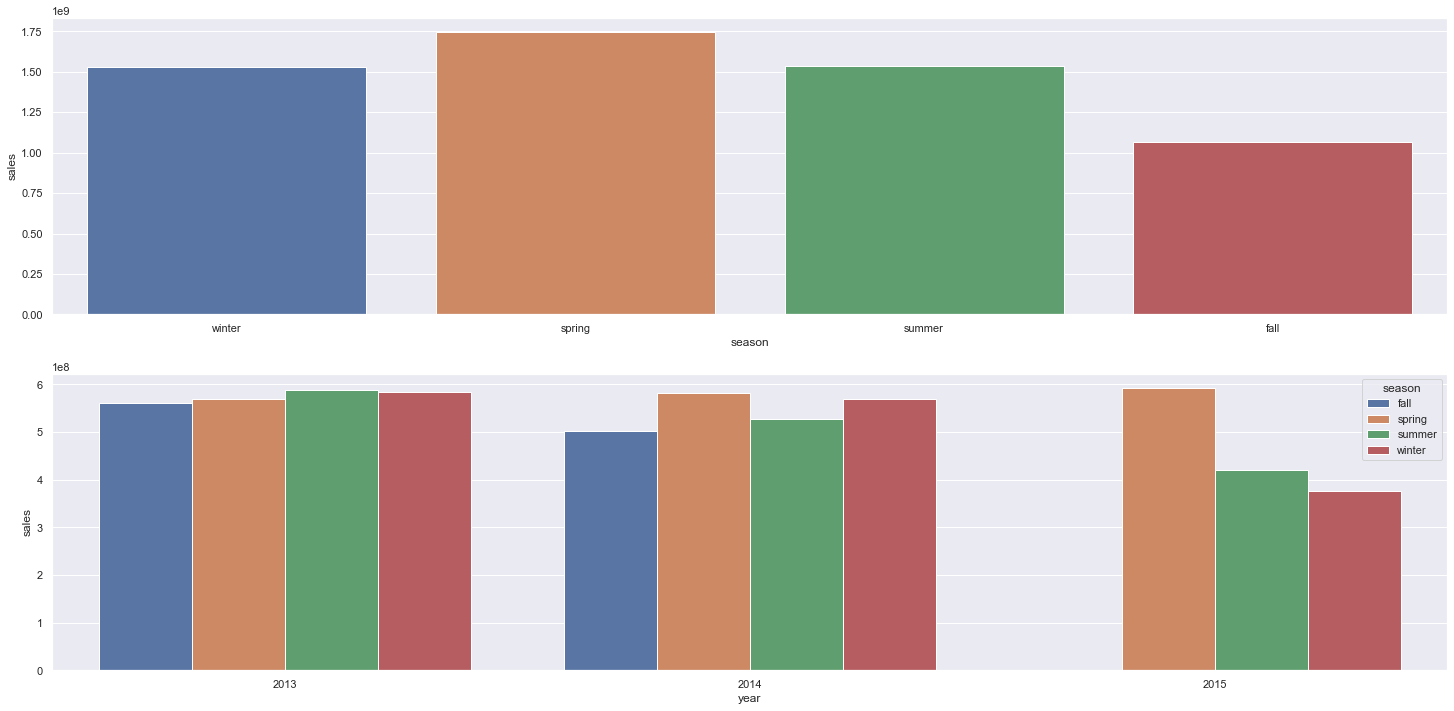

In [33]:
h12 = df4[['season','sales']].groupby('season').sum().reset_index()
plt.subplot(2,1,1)
sns.barplot(x='season',y='sales',data=h12,order=['winter','spring','summer','fall'])
plt.subplot(2,1,2)
h12_b = df4[['year','season','sales']].groupby(['year','season']).sum().reset_index()
sns.barplot(x='year',hue='season',y='sales',data=h12_b)

**Falso, lojas vendem mais na primavera
obs: como o dataset só vai até 2015-07, fall tem uma queda de vendas pelo desbalanceamento**

**False, stores sell more in spring. obs:the datasat only goes up to 2015-07, so the fall season has a drop in sales because of unbalancing**

### h13: Lojas vendem menos durante os feriados escolares

**h13: Stores should sell less during school holidays**

<AxesSubplot:xlabel='month', ylabel='sales'>

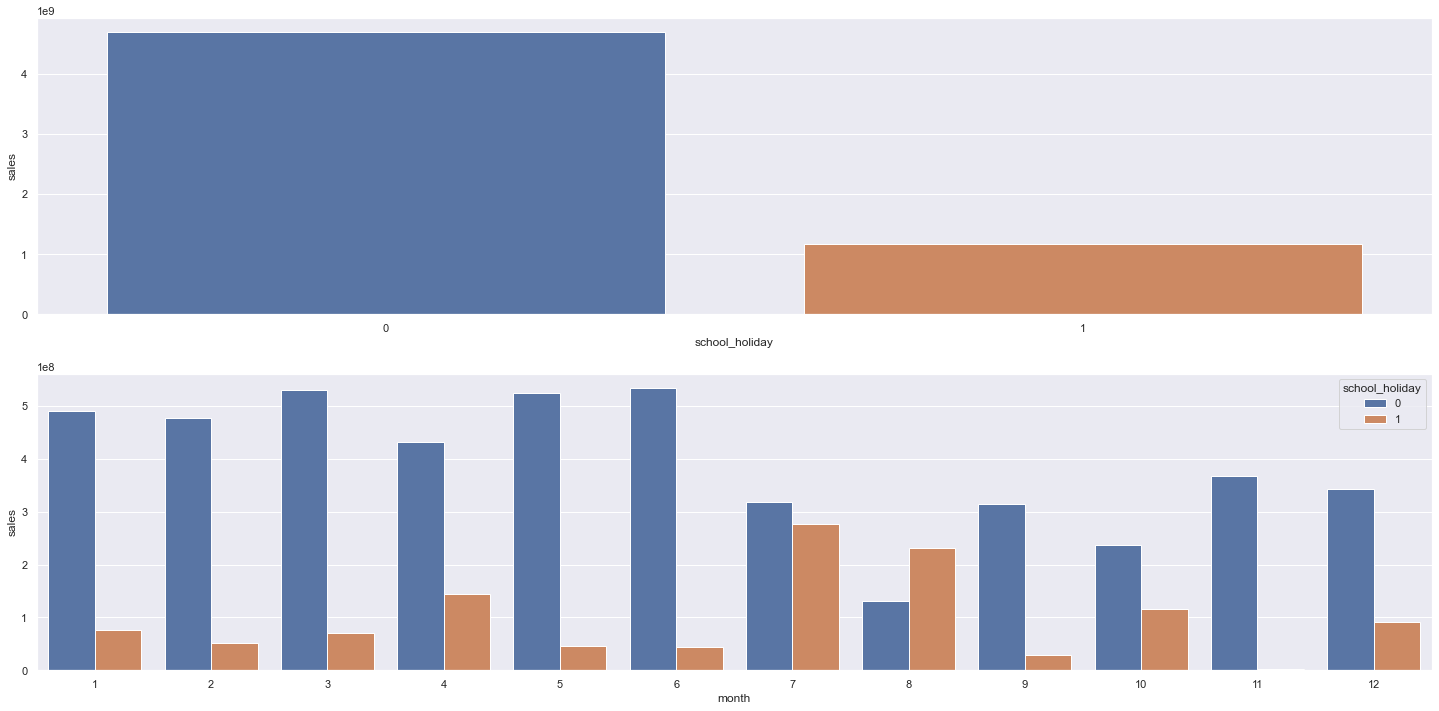

In [34]:
h13 = df4[['school_holiday','sales']].groupby('school_holiday').sum().reset_index()
plt.subplot(2,1,1)
sns.barplot(x='school_holiday',y='sales',data=h13)
plt.subplot(2,1,2)
h13_b = df4[['month','school_holiday','sales']].groupby(['month','school_holiday']).sum().reset_index()
sns.barplot(x='month',y='sales',hue='school_holiday',data=h13_b)

**Verdadeiro, lojas vendem menos durante os feriados escolares**

**True, stores sell less during schools holidays**

## Multivariate analysis

### Numerical variables

<AxesSubplot:>

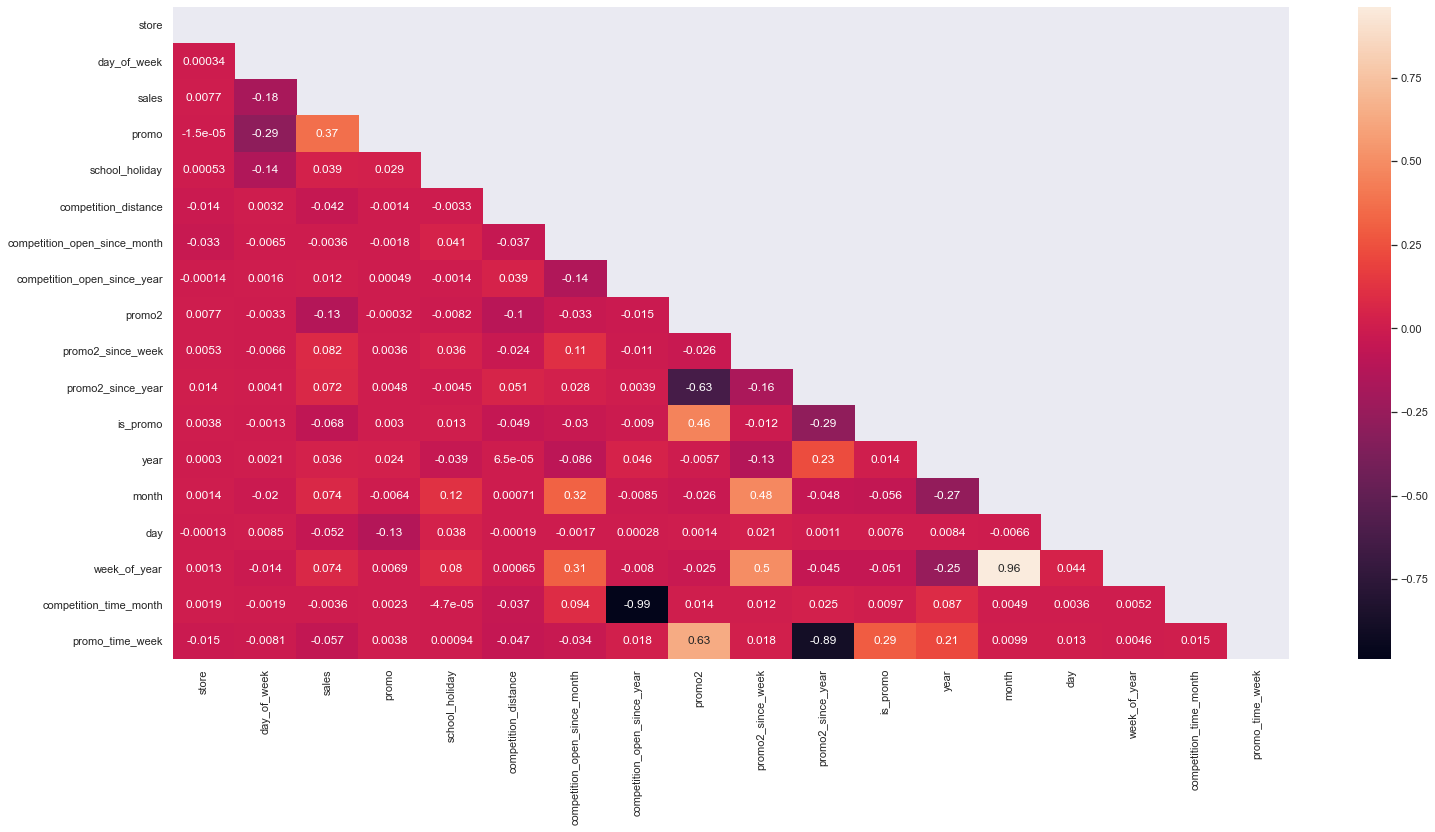

In [35]:
coorelation = num_attribures.corr(method='pearson')
matrix = np.triu(coorelation)
sns.heatmap(coorelation,annot=True,mask=matrix)

### Categorical Variable

<AxesSubplot:>

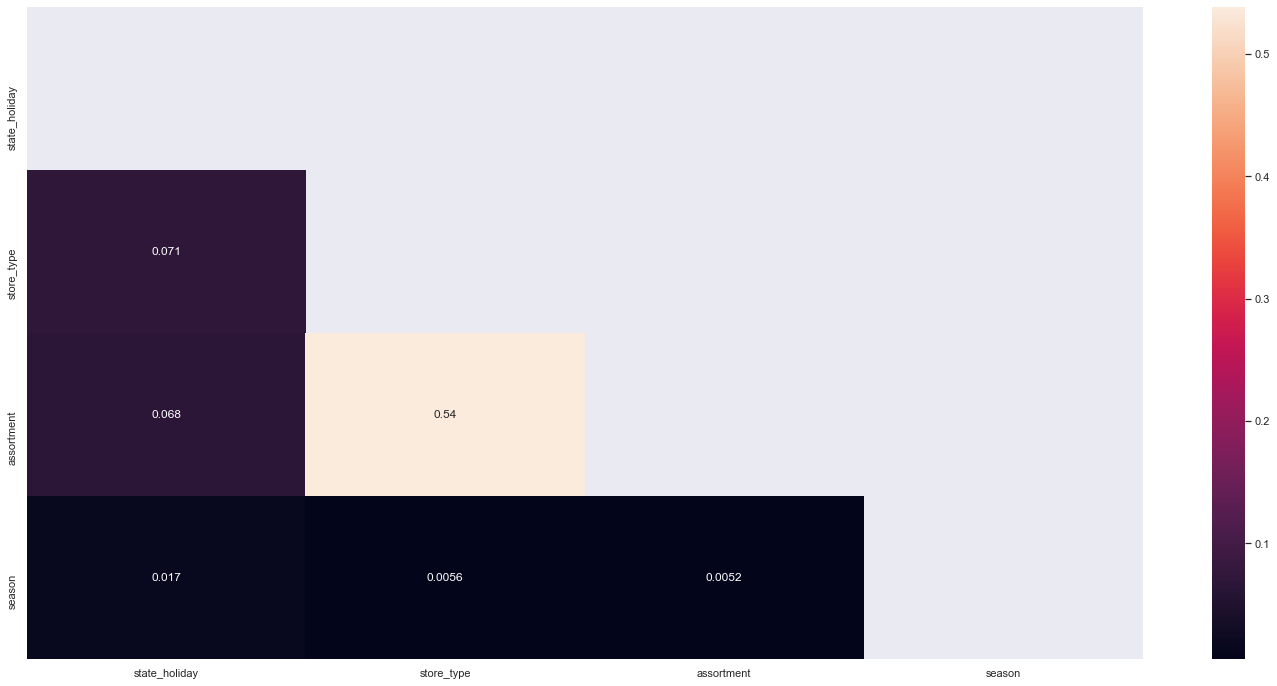

In [36]:
cat = df4.select_dtypes(include=['object'])


cat_list = ['state_holiday', 'store_type', 'assortment','season']
cat_dic = {}


for c1 in cat_list:
    for c2 in cat_list:
        v = cramer_v(cat[c1], cat[c2])

        if cat_list.index(c2) == 0:
            cat_dic[c1] = []
            cat_dic[c1].append(v)

        else:
            cat_dic[c1].append(v)


cramer_v_table = pd.DataFrame(cat_dic)
cramer_v_table.set_index(cramer_v_table.columns, inplace=True)

matrix = np.triu(cramer_v_table)
sns.heatmap(cramer_v_table, annot=True,mask=matrix)

In [37]:
#df4.to_csv('../data/df4.csv',index=False)